# Python Tutorial on Topological Data Analysis

## Elizabeth Munch
 Dept of Computational Mathematics, Science and Engineering
 Dept of Mathematics
 Michigan State University

# Welcome

This notebook is meant to be a first step introduction to some available tools for computation of TDA signatures using python.  This repository includes the jupyter notebooks for the 2021 Workshop ["Mathematical and Computational Methods for Complex Social Systems"](https://www.google.com/url?q=https://meetings.ams.org/math/sc2021/meetingapp.cgi) to be held at the virtual JMM 2021, led by [Elizabeth Munch](http://elizabethmunch.com/). This introduction is tailored for a network science audience, so the focus is on an relevant tools when given a network input.

These slides are written to be presented as [RISE slides](https://rise.readthedocs.io/en/stable/index.html), however the notebook should be self contained without needing this installed. If you see a lot of weird cell toolbars in the notebook (which are used for controlling the slideshow version), these can be removed from your view of the jupyter notebook by going to View -> Cell Toolbar -> None













# Goals

- Give a brief overview of available packages
- Provide pipelines for computing persistent homology for input data such as a discrete metric space and a weighted graph. 
- Give you a place to start....




# Things I won't get to

- Every possible filtration
- Graphical signatures of data
  - Reeb graphs
  - Mapper graphs 
  - Merge trees
  - Contour trees

# Options to follow along



- Download from the github repo: [github.com/lizliz/TDA-Python-Workshop-JMM21](https://github.com/lizliz/TDA-Python-Workshop-JMM21)
- Run directly from binder: [tinyurl.com/jmm-tda](https://tinyurl.com/jmm-tda)



# An incomplete list of available software

There are so many.....


New packages are being developed incredibly quickly.  I'm so happy to see the field taking off so fast.  That being said, I am choosing to use some of the packages I am most familiar with, which does not mean they will be the best option for your task. An incomplete and almost immeidately outdated list of available options is below. Any ommissions are uninentional. 

- [SciKitTDA](https://scikit-tda.org/) by Nataniel Saul and Chris Tralie
- [Teaspoon](http://elizabethmunch.com/code/teaspoon/index.html) By Liz Munch and Firas Khasawneh


- [Ripser](https://github.com/Ripser/ripser) by Ulrich Bauer (C++)
- [GUDHI](http://gudhi.gforge.inria.fr/) developed at INRIA
- [Giotto-tda](https://giotto-ai.github.io/) developted at EPFL
- [Cubicle](https://bitbucket.org/hubwag/cubicle/src/master/) by Hubert Wagner
- [HomcCube](https://i-obayashi.info/software.html) By Ippei Obayashi.
- [DIPHA](https://github.com/DIPHA/dipha) by Ulrich Bauer and Michael Kerber
- [diamorse](https://github.com/AppliedMathematicsANU/diamorse) developed at The Australian National University.
- [Perseus](http://people.maths.ox.ac.uk/nanda/perseus/) by Vidit Nanda
- [Dionysus2](https://www.mrzv.org/software/dionysus2/) by Dimitry Morozov (C++, Python)
- [CliqueTop](https://github.com/nebneuron/clique-top) by Chad Giusti (Matlab)
- [Eirene](http://gregoryhenselman.org/eirene/index.html) by Greg Henselman (Julia)
- [Ripser-live](http://live.ripser.org/)  by Ulrich Bauer (browser)
- [CHomP](https://github.com/shaunharker/CHomP") by Shaun Harker (C++) 
- [Hera](https://bitbucket.org/grey_narn/hera) by Michael Kerber, Dmitriy Morozov, and Arnur Nigmetov
- [JavaPlex](https://github.com/appliedtopology) by Andrew Tausz, Mikael Vejdemo-Johansson and Henry Adams
- [PHAT](https://bitbucket.org/phat-code/phat) by Ulrich Bauer, Michael Kerber, Jan Reininghaus, Hubert Wagner, and Bryn Keller
-    <a href="https://topology-tool-kit.github.io/" target="_blank">Topology ToolKit</a>&nbsp;(C++) by&nbsp;Julien Tierny, Guillaume Favelier, Joshua Levine, Charles Gueunet, and Micha&euml;l Michaux (I think?)
-   <a href="https://cran.r-project.org/web/packages/TDA/index.html" target="_blank">TDA</a>&nbsp;(R)&nbsp;by&nbsp;Brittany T. Fasy, Jisu Kim, Fabrizio Lecci, and Cl&eacute;ment Maria
-    <a href="https://github.com/paultpearson/TDAmapper" target="_blank">TDAMapper </a>(R) by&nbsp;Paul Pearson, Daniel M&uuml;ellner, and Gurjeet Singh
-    <a href="https://people.clas.ufl.edu/peterbubenik/intro-to-tda/" target="_blank">R scripts for TDA</a>&nbsp;by Peter Bubenik
-    <a href="https://github.com/nebneuron/Simplicial" target="_blank">Simplicial complexes for Julia</a> by Alex Kunin and Vladimir Itskov
-    <a href="http://web.cse.ohio-state.edu/~dey.8/SimBa/Simba.html" target="_blank">SimBa</a>&nbsp;and&nbsp;<a href="http://web.cse.ohio-state.edu/~dey.8/SimPers/Simpers.html" target="_blank">SimPer</a>&nbsp;(C++) by&nbsp;Tamal K Dey, &nbsp;Fengtao Fan, &nbsp;Dayu Shi, &nbsp;and Yusu Wan&nbsp;
- <a href="http://danifold.net/mapper/index.html" target="_blank">Python Mapper</a>&nbsp;(Python) by&nbsp;Daniel M&uuml;llner and Aravindakshan Babu
-    <a href="https://www.math.upenn.edu/~dlotko/persistenceLandscape.html" target="_blank">Persistence Landscape Toolbox</a>&nbsp;(C++) by Pawel Dlotko&#8203;
    

# Basic imports 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
from IPython.display import Video

# scikit-tda imports..... Install all with -> pip install scikit-tda
#--- this is the main persistence computation workhorse
import ripser
# from persim import plot_diagrams
import persim
# import persim.plot

# teaspoon imports...... Install with -> pip install teaspoon
#---these are for generating data and some drawing tools 
import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw

#---these are for generating time series network examples
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL
2

# Warning

Persistence diagrams can have multiplicity!

# Distances between persistence diagrams 

In [77]:
# Make three example point clouds 
r = 1
R = 2
P1 = makePtCloud.Annulus(N=200, r=r, R=R, seed=None) # teaspoon data generation
P2 = makePtCloud.Annulus(N=200, r=r, R=R, seed=None)
P2[:,1] += 6
P3 = DoubleAnnulus()
P3 *= 1.1
P3[:,0] += 6
P3[:,1] += 3

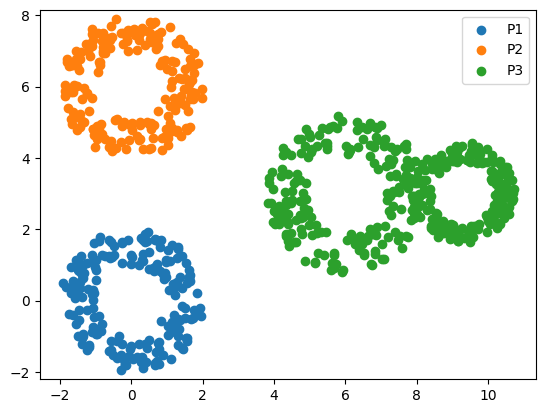

In [78]:
# plt.figure(figsize = (15,5))
plt.scatter(P1[:,0],P1[:,1], label = 'P1')
plt.scatter(P2[:,0],P2[:,1], label = 'P2')
plt.scatter(P3[:,0],P3[:,1], label = 'P3')
plt.axis('equal')
plt.legend()

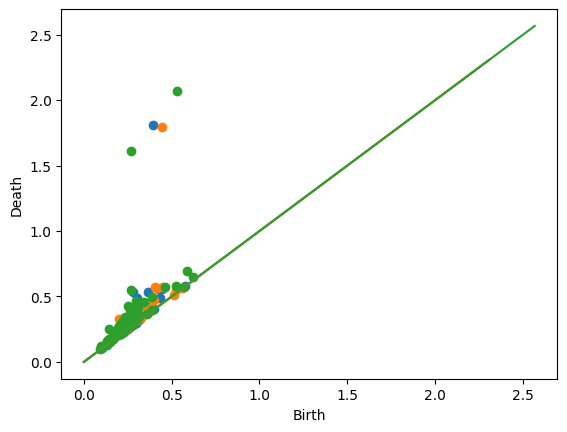

In [84]:
# Compute their diagrams 
diagrams1 = ripser.ripser(P1)['dgms']
diagrams2 = ripser.ripser(P2)['dgms']
diagrams3 = ripser.ripser(P3)['dgms']

Draw.drawDgm(diagrams1[1])
Draw.drawDgm(diagrams2[1])
Draw.drawDgm(diagrams3[1])


### Bottleneck Distance 

0.10316070914268494


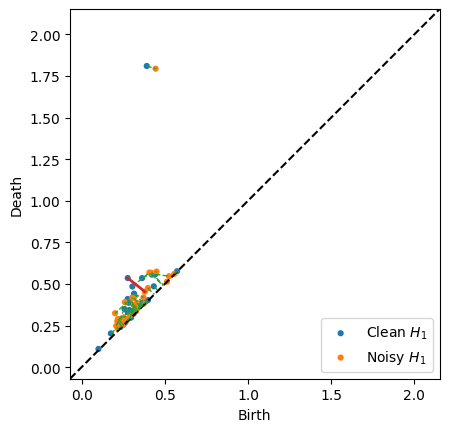

In [85]:
distance_bottleneck, matching = persim.bottleneck(diagrams1[1], diagrams2[1], matching=True)
persim.visuals.bottleneck_matching(diagrams1[1], diagrams2[1], matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
print(distance_bottleneck)

The bottleneck distance is 0.10316070914268494


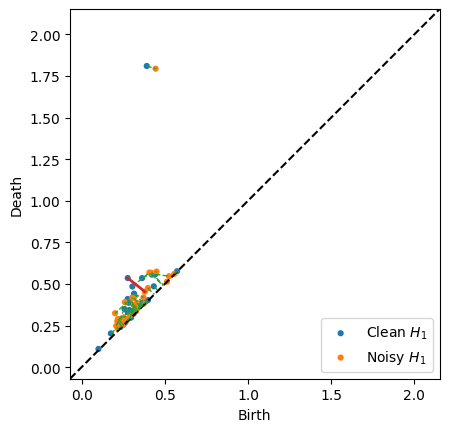

In [86]:
# Compute bottleneck distance using scikit-tda
distance_bottleneck, matching  = persim.bottleneck(diagrams1[1], diagrams2[1], matching=True)
persim.visuals.bottleneck_matching(diagrams1[1], diagrams2[1], matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
print('The bottleneck distance is', distance_bottleneck)
# print(matching)
# print(D)

The bottleneck distance is 0.6713370531797409


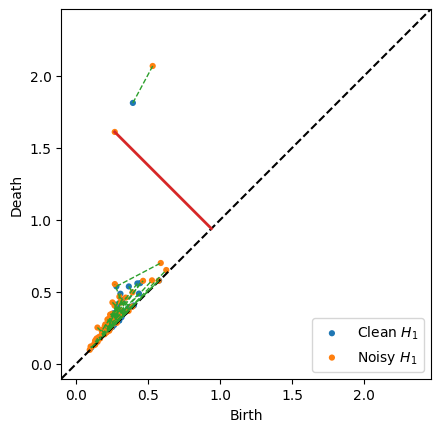

In [83]:
# Compute bottleneck of P1 and P3
distance_bottleneck, matching = persim.bottleneck(diagrams1[1], diagrams3[1], matching=True)
persim.visuals.bottleneck_matching(diagrams1[1], diagrams3[1], matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
print('The bottleneck distance is', distance_bottleneck)

# But Liz, what should I do next? 



Ha I have no idea! But here are some next steps to read about/try.  Happy to discuss more during the small group session! 


- Different input data and/or filtrations
  - Something other than clique complexes
  - Directed complexes 
  - Image data 
- ML and statistics interfaces: featurizations 
  - [Persistence images](https://www.jmlr.org/papers/v18/16-337.html)
  - [Persistence landscapes](https://www.jmlr.org/papers/volume16/bubenik15a/bubenik15a.pdf)
  - [Template functions](https://arxiv.org/abs/1902.07190)
  - Lots and lots more......
  

  
- Other TDA signatures 
  - Reeb graphs
  - [Mapper graphs ](https://research.math.osu.edu/tgda/mapperPBG.pdf)
  - Merge trees
  - Contour trees 
  - Morse-Smale complexes


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:white;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}

</style>

# Thank you!!!

- Content adapted from tutorials by [Audun Myers](https://www.audunmyers.com/) and [Chris Tralie](http://www.ctralie.com/)
- Get connected: [WinCompTop](https://awmadvance.org/research-networks/wincomptop-women-in-computational-topology/)
- My survey papers:  [User's guide](https://learning-analytics.info/index.php/JLA/article/view/5196),    [Bio focus](https://anatomypubs.onlinelibrary.wiley.com/doi/full/10.1002/dvdy.175)

<table class="tg">

<tbody>
  <tr>
    <td class="tg-baqh">
        <img src = "https://evacenteno.com/wp-content/uploads/2015/08/icon-blue-email-294x300.png" alt = "email icon" style="width:30px;"/>
        <a href="mailto:muncheli@msu.edu">muncheli@msu.edu</a>
    </td>
    <td class="tg-baqh">
        <img src = "https://www.flaticon.com/svg/static/icons/svg/975/975645.svg" alt = "Website icon" style="width:30px;"/>
        <a href="http://elizabethmunch.com">elizabethmunch.com</a>
    </td>
    <td class="tg-baqh">
        <img src = "https://www.flaticon.com/svg/static/icons/svg/220/220233.svg" alt="Twitter icon"style="width:30px;"/>
        <a href="https://twitter.com/elizabethmunch">@elizabethmunch</a>
    </td>
    <td>
        <img src="https://www.nsf.gov/images/logos/NSF_4-Color_vector_Logo_thumb.jpg" alt="NSF Logo" style="width:80px">
      </td>
          <td>
        <img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg" alt="MSU CMSE Logo" style="width:80px">
      </td>
       
  </tr>
</tbody>
</table>


